In [103]:
# Importo las librerias a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
# Cargo la información en un dataframe
dfEntrenamiento = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
dfPrueba = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

In [105]:
dfEntrenamiento.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [106]:
dfEntrenamiento.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [107]:
dfEntrenamiento[['GrLivArea', 'SalePrice']]

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000
...,...,...
1455,1647,175000
1456,2073,210000
1457,2340,266500
1458,1078,142125


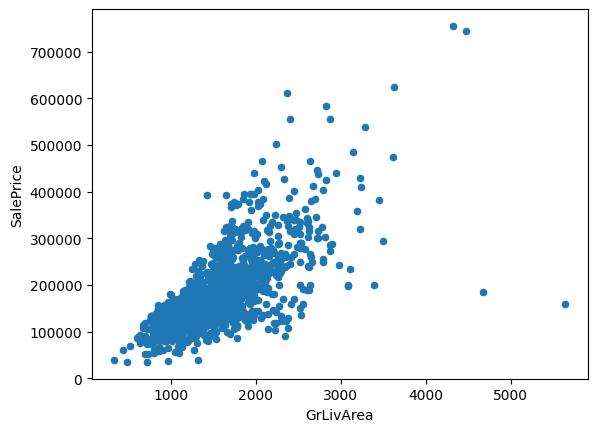

In [108]:
# Visualizar los datos
dfEntrenamiento.plot.scatter(x='GrLivArea', y='SalePrice')
plt.show()

In [109]:
dfEntrenamiento[['GrLivArea', 'SalePrice']].describe()

,GrLivArea,SalePrice
count,1460.000000,1460.000000
mean,1515.463699,180921.195890
std,525.480383,79442.502883
min,334.000000,34900.000000
25%,1129.500000,129975.000000
50%,1464.000000,163000.000000
75%,1776.750000,214000.000000
max,5642.000000,755000.000000


In [110]:
# Parametros de la recta
w = 125
b = 0

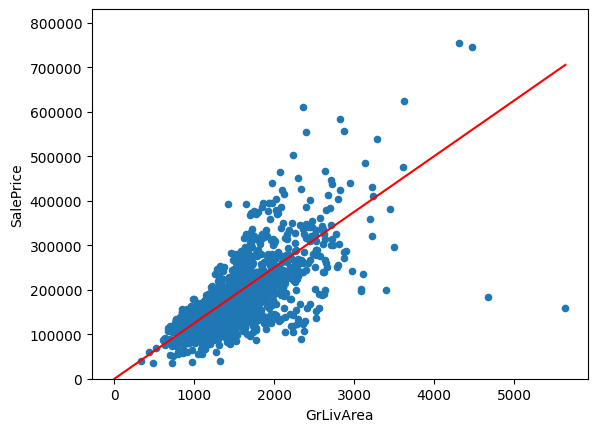

In [111]:
# Puntos de la recta
x = np.linspace(0, dfEntrenamiento['GrLivArea'].max(), 100)
y = w*x+b

# Graficar la recta
dfEntrenamiento.plot.scatter(x='GrLivArea', y='SalePrice')
plt.plot(x,y,'-r')
plt.ylim(0, dfEntrenamiento['SalePrice'].max()*1.1)
plt.show()

In [112]:
# Se calcula la predicción
dfEntrenamiento['Prediccion'] = dfEntrenamiento['GrLivArea']*w+b

In [113]:
# Se calcula la diferencia entre la predicción y el valor
dfEntrenamiento['Diferencia'] = dfEntrenamiento['Prediccion'] - dfEntrenamiento['SalePrice']
# Obtiene el error cuadratico
dfEntrenamiento['Cuadratica'] = dfEntrenamiento['Diferencia']**2
dfEntrenamiento.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Prediccion,Diferencia,Cuadratica
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,213750,5250,27562500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,157750,-23750,564062500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,223250,-250,62500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,214625,74625,5568890625
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,274750,24750,612562500


In [114]:
dfEntrenamiento['Cuadratica'].mean()

3300407822.406164

In [115]:
w = np.linspace(50, 200, 50)
dfError = pd.DataFrame(w, columns=['w'])
print(dfError)

             w
0    50.000000
1    53.061224
2    56.122449
3    59.183673
4    62.244898
5    65.306122
6    68.367347
7    71.428571
8    74.489796
9    77.551020
10   80.612245
11   83.673469
12   86.734694
13   89.795918
14   92.857143
15   95.918367
16   98.979592
17  102.040816
18  105.102041
19  108.163265
20  111.224490
21  114.285714
22  117.346939
23  120.408163
24  123.469388
25  126.530612
26  129.591837
27  132.653061
28  135.714286
29  138.775510
30  141.836735
31  144.897959
32  147.959184
33  151.020408
34  154.081633
35  157.142857
36  160.204082
37  163.265306
38  166.326531
39  169.387755
40  172.448980
41  175.510204
42  178.571429
43  181.632653
44  184.693878
45  187.755102
46  190.816327
47  193.877551
48  196.938776
49  200.000000


In [116]:
def CalcularError(w, dfEntrenamiento):
    """Función que permite calcular el error cuadratico medio.
    
    Parametros:
    -----------
    w: Integer
        Error.

    dfEntrenamiento: Dataframe
        Conjunto de datos de entrenamiento.
    
    Retorna:
    --------
    Integer
        Error cuadratico medio.
    """
    b=0
    dfEntrenamiento['Prediccion'] = dfEntrenamiento['GrLivArea']*w+b
    dfEntrenamiento['Diferencia'] = dfEntrenamiento['Prediccion'] - dfEntrenamiento['SalePrice']
    dfEntrenamiento['Cuadratica'] = dfEntrenamiento['Diferencia']**2
    return dfEntrenamiento['Cuadratica'].mean()

In [117]:
# Calcula el error para cada w
dfError['Error'] = dfError['w'].apply(lambda x: CalcularError(x, dfEntrenamiento))
print(dfError.head())

           w         Error
0  50.000000  1.509658e+10
1  53.061224  1.404857e+10
2  56.122449  1.304878e+10
3  59.183673  1.209720e+10
4  62.244898  1.119384e+10


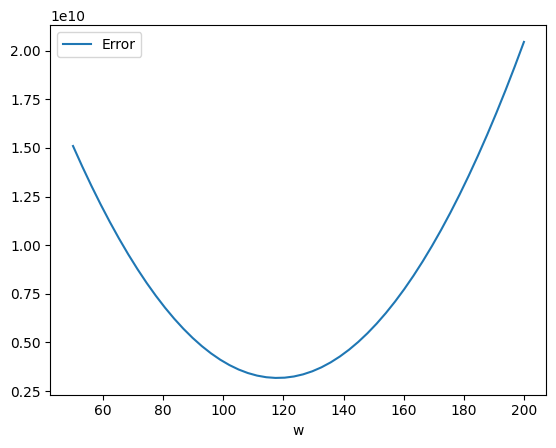

In [118]:
# Grafica los resultado
dfError.plot(x='w', y='Error')
plt.show()

In [119]:
from sklearn.linear_model import LinearRegression

# Define la variable independiente y dependiente
x = np.array(dfEntrenamiento['GrLivArea']).reshape((-1, 1))
y = np.array(dfEntrenamiento['SalePrice'])

# Crea el modelo
modelo = LinearRegression(fit_intercept=False)
modelo.fit(x, y)

# Imprime los resultado
print(f"Interceptor (b): {modelo.intercept_}")
print(f"Pendiente (w): {modelo.coef_}")



Interceptor (b): 0.0
Pendiente (w): [118.06909986]
